<a href="https://colab.research.google.com/github/mdikas/final-project-zenius-data-analyst/blob/main/Final_Project_Zenius_Data_Analysis_Kelompok_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, plot_confusion_matrix,plot_roc_curve

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSIB/Dataset/transactions.csv')

In [ ]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
# Drop kolom kosong

df = df.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
# Check missing values

df.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64

In [ ]:
df.shape

(641914, 23)

In [ ]:
# drop row yang memiliki null value
df = df.dropna()
 
# reset index
df = df.reset_index(drop = True)

In [ ]:
df.shape

(633846, 23)

Explore Categorical Variables

In [ ]:
# melihat banyak categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('{} categorical variables\n'.format(len(categorical)))

9 categorical variables



In [ ]:
categorical

['transactionDateTime',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'merchantCategoryCode',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange',
 'transactionType']

In [ ]:
# melihat banyak variable boolean

boolean = [var for var in df.columns if df[var].dtype=='bool']

print('{} boolean variables\n'.format(len(boolean)))

3 boolean variables



In [ ]:
boolean

['isFraud', 'cardPresent', 'expirationDateKeyInMatch']

In [ ]:
# Melihat jumlah label setiap categorical variables

for var in categorical:
    print(var, ' memiliki ', len(df[var].unique()), ' label')

transactionDateTime  memiliki  627556  label
merchantName  memiliki  2491  label
acqCountry  memiliki  4  label
merchantCountryCode  memiliki  4  label
merchantCategoryCode  memiliki  19  label
currentExpDate  memiliki  165  label
accountOpenDate  memiliki  1826  label
dateOfLastAddressChange  memiliki  2186  label
transactionType  memiliki  3  label


In [ ]:
df['transactionDateTime'].head()

0    2016-01-08T19:04:50
1    2016-01-09T22:32:39
2    2016-01-11T13:36:55
3    2016-01-11T22:47:46
4    2016-01-16T01:41:11
Name: transactionDateTime, dtype: object

In [ ]:
# Mengubah tipe data 'transactionDateTime' menjadi datetime

df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['transactionDateTime']

0        2016-01-08 19:04:50
1        2016-01-09 22:32:39
2        2016-01-11 13:36:55
3        2016-01-11 22:47:46
4        2016-01-16 01:41:11
                 ...        
633841   2016-12-04 12:29:21
633842   2016-12-09 04:20:35
633843   2016-12-16 07:58:23
633844   2016-12-19 02:30:35
633845   2016-12-28 11:14:14
Name: transactionDateTime, Length: 633846, dtype: datetime64[ns]

In [ ]:
# menidentifikasi duplikasi transaksi berdasarkan kolom 'transactionDateTime', 'accountNumber', 'transactionAmount' dengan perbandingan waktu 10 menit
Duplicated = (df.sort_values(['transactionDateTime']).groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime'].diff().dt.total_seconds().lt(600))

In [ ]:
Duplicated.value_counts()

False    623275
True      10571
Name: transactionDateTime, dtype: int64

In [ ]:
# membuat kolom 'duplikasi'

df['duplikasi'] = Duplicated

In [ ]:
# Mengekstrasi/memisahkan transactionDateTime menjadi year,month,week,day,hour,dan minute

df['transaction_year'] = df['transactionDateTime'].dt.year
df['transaction_month'] = df['transactionDateTime'].dt.month
df['transaction_week'] = df['transactionDateTime'].dt.weekday
df['transaction_day'] = df['transactionDateTime'].dt.day
df['transaction_hour'] = df['transactionDateTime'].dt.hour
df['transaction_minute'] = df['transactionDateTime'].dt.minute

In [ ]:
# drop kolom transactionDateTime

df = df.drop(columns=['transactionDateTime'])

In [ ]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,currentBalance,cardPresent,expirationDateKeyInMatch,duplikasi,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,733493772,733493772,5000,5000.00,111.33,Lyft,US,US,5.0,1.0,...,0.00,False,False,False,2016,1,4,8,19,4
1,733493772,733493772,5000,4888.67,24.75,Uber,US,US,9.0,1.0,...,111.33,False,False,False,2016,1,5,9,22,32
2,733493772,733493772,5000,4863.92,187.40,Lyft,US,US,5.0,1.0,...,136.08,False,False,False,2016,1,0,11,13,36
3,733493772,733493772,5000,4676.52,227.34,Lyft,US,US,2.0,1.0,...,323.48,False,False,False,2016,1,0,11,22,47
4,733493772,733493772,5000,4449.18,0.00,Lyft,US,US,2.0,1.0,...,550.82,False,False,False,2016,1,5,16,1,41


In [ ]:
# Melihat value yang sama antara kolom accountNumber dan customerId

df['accountNumber'].eq(df['customerId']).value_counts()

True    633846
dtype: int64

In [ ]:
# melihat unique values acqCountry dan merchantCountryCode

df['acqCountry'].unique()

array(['US', 'PR', 'MEX', 'CAN'], dtype=object)

In [ ]:
df['merchantCountryCode'].unique()

array(['US', 'PR', 'MEX', 'CAN'], dtype=object)

In [ ]:
# Mengatasi nilai value yang sama (US,MEX,PR,CAN)

cols = []
for column in df.merchantCountryCode:
    if column == 'MEX':
      cols.append(f'MEX_{1}')
      continue
    elif column == 'US':
      cols.append(f'US_{1}')
      continue
    elif column == 'PR':
      cols.append(f'PR_{1}')
      continue 
    elif column == 'CAN':
      cols.append(f'CAN_{1}')
      continue 
    cols.append(column)
df.merchantCountryCode = cols

In [ ]:
df['merchantCountryCode'].unique()

array(['US_1', 'PR_1', 'MEX_1', 'CAN_1'], dtype=object)

Explore Numerical Variables

In [ ]:
# melihat banyak numerical variables

numerical = [var for var in df.columns if df[var].dtype=='int64' or df[var].dtype=='float64']

print('{} numerical variables\n'.format(len(numerical)))

17 numerical variables



In [ ]:
df[numerical].head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,733493772,733493772,5000,5000.00,111.33,5.0,1.0,492,492,9184,0.00,2016,1,4,8,19,4
1,733493772,733493772,5000,4888.67,24.75,9.0,1.0,492,492,9184,111.33,2016,1,5,9,22,32
2,733493772,733493772,5000,4863.92,187.40,5.0,1.0,492,492,9184,136.08,2016,1,0,11,13,36
3,733493772,733493772,5000,4676.52,227.34,2.0,1.0,492,492,9184,323.48,2016,1,0,11,22,47
4,733493772,733493772,5000,4449.18,0.00,2.0,1.0,492,492,9184,550.82,2016,1,5,16,1,41


Explore Target Variable

In [ ]:
# melihat persentase True/False kolom 'isFraud'

y = df['isFraud']
print(f'Persentase Fraud:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} transaksi)\nPersentase bukan Fraud: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} transaksi)')

Persentase Fraud:  1.72 %  --> (10892 transaksi)
Persentase bukan Fraud: 98.28  %  --> (622954 transaksi)


In [ ]:
622954/10892

57.193720161586484

Imbalance data dengan perbandingan 57:1

# Exploratory Data Analysis

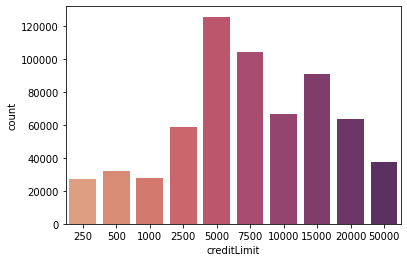

In [ ]:
sns.countplot(df['creditLimit'].sort_values().astype(str),palette="flare")

Sebagian besar Kartu Kredit memiliki limit 5000, posisi ke-2 dengan limit 7500.

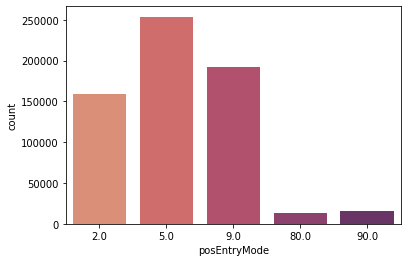

In [ ]:
sns.countplot(df['posEntryMode'].sort_values().astype(str),palette="flare")

Sebagian besar metode entry dengan code 05 (Integrated circuit card read) <br>dan posisi kedua dengan code 09 (Primary account number via e-commerce)

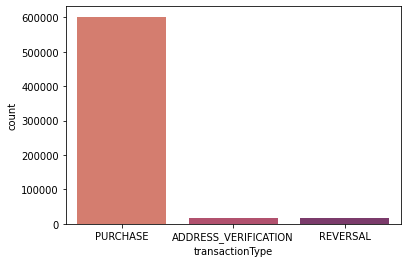

In [ ]:
sns.countplot(df['transactionType'],palette="flare")

Tipe transaksi didominasi oleh tipe pembelian

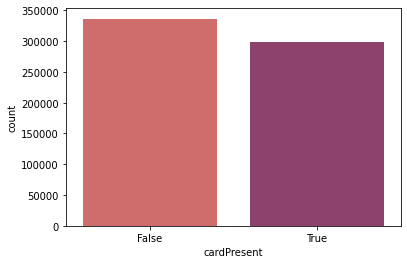

In [ ]:
sns.countplot(df['cardPresent'].astype(str),palette="flare")

terdistribusi secara hampir seimbang

[Text(0, 0, 'Lyft'),
 Text(0, 0, 'Uber'),
 Text(0, 0, 'gap.com'),
 Text(0, 0, 'target.com'),
 Text(0, 0, 'apple.com'),
 Text(0, 0, 'alibaba.com'),
 Text(0, 0, 'staples.com'),
 Text(0, 0, 'amazon.com'),
 Text(0, 0, 'ebay.com'),
 Text(0, 0, 'oldnavy.com')]

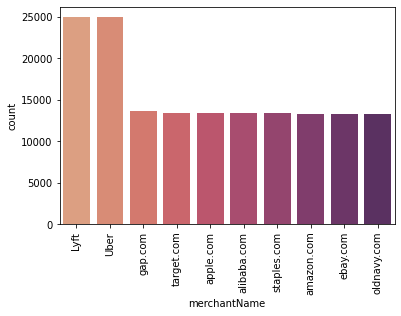

In [ ]:
ax = sns.countplot(df['merchantName'], palette="flare", order=df['merchantName'].sort_values().value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Top 10 Merchant by count

[Text(0, 0, 'online_retail'),
 Text(0, 0, 'fastfood'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'food'),
 Text(0, 0, 'rideshare'),
 Text(0, 0, 'online_gifts'),
 Text(0, 0, 'hotels'),
 Text(0, 0, 'fuel'),
 Text(0, 0, 'subscriptions'),
 Text(0, 0, 'personal care')]

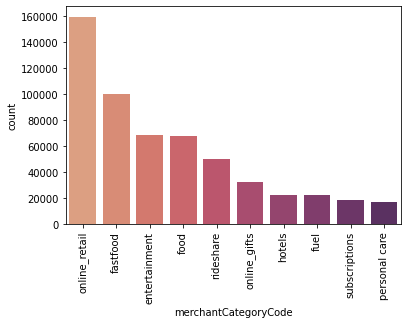

In [ ]:
ax = sns.countplot(df['merchantCategoryCode'], palette="flare", order=df['merchantCategoryCode'].sort_values().value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Top 10 kategori transaksi



---





In [ ]:
# melihat summary numerical variable

print(round(df[numerical].describe()),2)

       accountNumber   customerId  creditLimit  availableMoney  \
count       633846.0     633846.0     633846.0        633846.0   
mean     554762734.0  554762734.0      10699.0          6653.0   
std      254741441.0  254741441.0      11462.0          9229.0   
min      100547107.0  100547107.0        250.0         -1245.0   
25%      322319158.0  322319158.0       5000.0          1116.0   
50%      543887911.0  543887911.0       7500.0          3578.0   
75%      786558938.0  786558938.0      15000.0          8162.0   
max      999985343.0  999985343.0      50000.0         50000.0   

       transactionAmount  posEntryMode  posConditionCode   cardCVV  \
count           633846.0      633846.0          633846.0  633846.0   
mean               135.0           9.0               3.0     557.0   
std                147.0          17.0              10.0     257.0   
min                  0.0           2.0               1.0     100.0   
25%                 32.0           2.0               1.

Outliers

Text(0.5, 1.0, 'currentBalance')

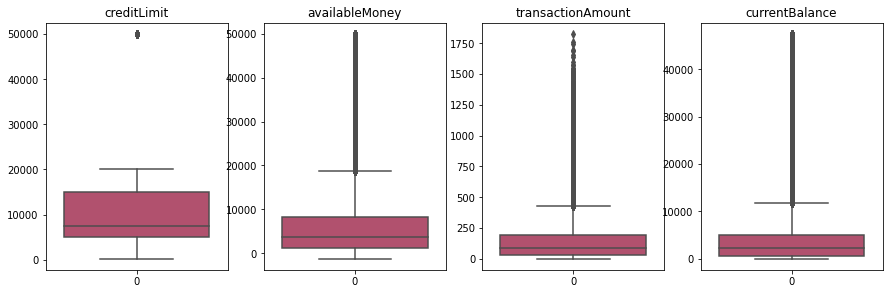

In [ ]:
# boxplots untuk menvisualize outlier

plt.figure(figsize=(15,10))


plt.subplot(2, 4, 1)
fig = sns.boxplot(data=df['creditLimit'],palette="flare")
fig.set_title('creditLimit')

plt.subplot(2, 4, 2)
fig = sns.boxplot(data=df['availableMoney'],palette="flare")
fig.set_title('availableMoney')

plt.subplot(2, 4, 3)
fig = sns.boxplot(data=df['transactionAmount'],palette="flare")
fig.set_title('transactionAmount')

plt.subplot(2, 4, 4)
fig = sns.boxplot(data=df['currentBalance'],palette="flare")
fig.set_title('currentBalance')

Text(0, 0.5, 'Count')

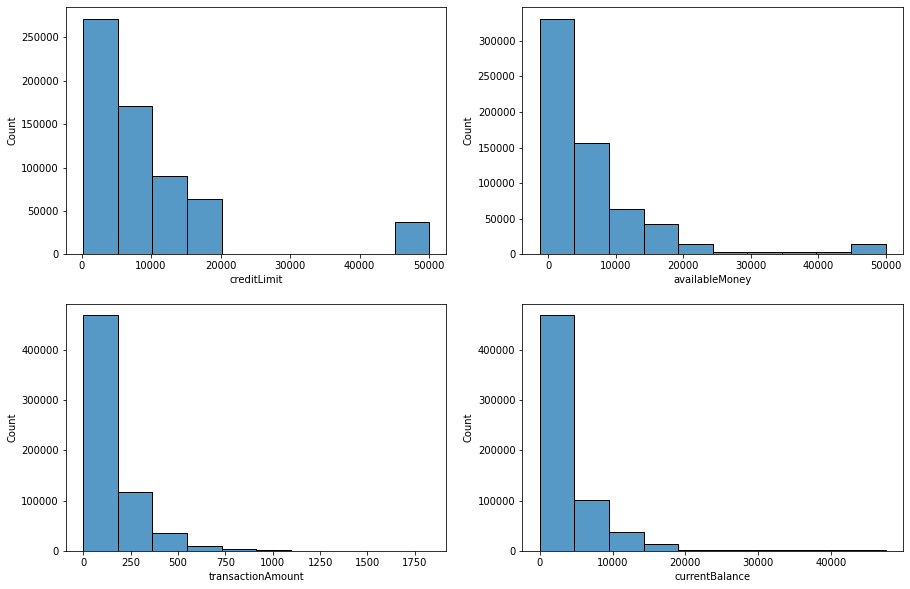

In [ ]:
# Plot histogram untuk melihat distribusi

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.histplot(df['creditLimit'],bins=10)
fig.set_xlabel('creditLimit')
fig.set_ylabel('Count')

plt.subplot(2, 2, 2)
fig = sns.histplot(df['availableMoney'],bins=10)
fig.set_xlabel('availableMoney')
fig.set_ylabel('Count')

plt.subplot(2, 2, 3)
fig = sns.histplot(df['transactionAmount'],bins=10)
fig.set_xlabel('transactionAmount')
fig.set_ylabel('Count')

plt.subplot(2, 2, 4)
fig = sns.histplot(df['currentBalance'],bins=10)
fig.set_xlabel('currentBalance')
fig.set_ylabel('Count')

Kita bisa lihat 4 variable tersebut right skewed. Jadi, kita bisa gunakan Interquantile Range (IQR) untuk melihat outlier.

In [ ]:
df1 = df.copy()

In [ ]:
# outliers kolom creditLimit variable

IQR1 = df.creditLimit.quantile(0.75) - df.creditLimit.quantile(0.25)
Lower_fence1 = df.creditLimit.quantile(0.25) - (IQR1 * 3)
Upper_fence1 = df.creditLimit.quantile(0.75) + (IQR1 * 3)
print('creditLimit minimum values =',df['creditLimit'].min())
print('creditLimit maximum values =',df['creditLimit'].max())
print('creditLimit outlier values > {upperboundary}'.format(lowerboundary=Lower_fence1, upperboundary=Upper_fence1))

creditLimit minimum values = 250
creditLimit maximum values = 50000
creditLimit outlier values > 45000.0


In [ ]:
# Deteksi outlier dengan menggunakan boolean

df1['outl_CL'] = df['creditLimit'] > Upper_fence1
df1['outl_CL'].value_counts()

False    596257
True      37589
Name: outl_CL, dtype: int64

In [ ]:
# outliers kolom availableMoney 

IQR2 = df.availableMoney.quantile(0.75) - df.availableMoney.quantile(0.25)
Lower_fence2 = df.availableMoney.quantile(0.25) - (IQR2 * 3)
Upper_fence2 = df.availableMoney.quantile(0.75) + (IQR2 * 3)
print('availableMoney minimum values =',df['availableMoney'].min())
print('availableMoney maximum values =',df['availableMoney'].max())
print('availableMoney outlier values > {upperboundary}'.format(lowerboundary=Lower_fence2, upperboundary=Upper_fence2))

availableMoney minimum values = -1244.93
availableMoney maximum values = 50000.0
availableMoney outlier values > 29299.700000000004


In [ ]:
# Deteksi outlier dengan menggunakan boolean

df1['outl_AM'] = df['availableMoney'] > Upper_fence2
df1['outl_AM'].value_counts()

False    609677
True      24169
Name: outl_AM, dtype: int64

In [ ]:
# outlier kolom transactionAmount

IQR3 = df.transactionAmount.quantile(0.75) - df.transactionAmount.quantile(0.25)
Lower_fence3 = df.transactionAmount.quantile(0.25) - (IQR3 * 3)
Upper_fence3 = df.transactionAmount.quantile(0.75) + (IQR3 * 3)
print('transactionAmount minimum values =',df['transactionAmount'].min())
print('transactionAmount maximum values =',df['transactionAmount'].max())
print('transactionAmount outlier values > {upperboundary}'.format(lowerboundary=Lower_fence3, upperboundary=Upper_fence3))

transactionAmount minimum values = 0.0
transactionAmount maximum values = 1825.25
transactionAmount outlier values > 659.24


In [ ]:
# Deteksi outlier dengan menggunakan boolean

df1['outl_TA'] = df['transactionAmount'] > Upper_fence3
df1['outl_TA'].value_counts()

False    626880
True       6966
Name: outl_TA, dtype: int64

In [ ]:
# outlier kolom currentBalance

IQR4 = df.currentBalance.quantile(0.75) - df.currentBalance.quantile(0.25)
Lower_fence4 = df.currentBalance.quantile(0.25) - (IQR4 * 3)
Upper_fence4 = df.currentBalance.quantile(0.75) + (IQR4 * 3)
print('currentBalance minimum values =',df['currentBalance'].min())
print('currentBalance maximum values =',df['currentBalance'].max())
print('currentBalance outlier values > {upperboundary}'.format(lowerboundary=Lower_fence4, upperboundary=Upper_fence4))

currentBalance minimum values = 0.0
currentBalance maximum values = 47496.5
currentBalance outlier values > 18516.38


In [ ]:
# Deteksi outlier dengan menggunakan boolean

df1['outl_CB'] = df['currentBalance'] > Upper_fence4
df1['outl_CB'].value_counts()

False    618103
True      15743
Name: outl_CB, dtype: int64

In [ ]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,currentBalance,cardPresent,expirationDateKeyInMatch,duplikasi,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,733493772,733493772,5000,5000.00,111.33,Lyft,US,US_1,5.0,1.0,...,0.00,False,False,False,2016,1,4,8,19,4
1,733493772,733493772,5000,4888.67,24.75,Uber,US,US_1,9.0,1.0,...,111.33,False,False,False,2016,1,5,9,22,32
2,733493772,733493772,5000,4863.92,187.40,Lyft,US,US_1,5.0,1.0,...,136.08,False,False,False,2016,1,0,11,13,36
3,733493772,733493772,5000,4676.52,227.34,Lyft,US,US_1,2.0,1.0,...,323.48,False,False,False,2016,1,0,11,22,47
4,733493772,733493772,5000,4449.18,0.00,Lyft,US,US_1,2.0,1.0,...,550.82,False,False,False,2016,1,5,16,1,41


Mengecek outliers = True & isFraud = True, jadi kita bisa melihat jumlah outlier yang fraud

In [ ]:
# Kolom outlier creditLimit

df1.groupby(['outl_CL','isFraud']).size()

outl_CL  isFraud
False    False      586005
         True        10252
True     False       36949
         True          640
dtype: int64

In [ ]:
# Kolom outlier availableMoney

df1.groupby(['outl_AM','isFraud']).size()

outl_AM  isFraud
False    False      599148
         True        10529
True     False       23806
         True          363
dtype: int64

In [ ]:
# Kolom outlier transactionAmount

df1.groupby(['outl_TA','isFraud']).size()

outl_TA  isFraud
False    False      616379
         True        10501
True     False        6575
         True          391
dtype: int64

In [ ]:
# Kolom outlier currentBalance

df1.groupby(['outl_CB','isFraud']).size()

outl_CB  isFraud
False    False      607533
         True        10570
True     False       15421
         True          322
dtype: int64

In [ ]:
# Drop Kolom customerId

df = df.drop(columns=['customerId'])

In [ ]:
df.head()

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,currentBalance,cardPresent,expirationDateKeyInMatch,duplikasi,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,733493772,5000,5000.00,111.33,Lyft,US,US_1,5.0,1.0,rideshare,...,0.00,False,False,False,2016,1,4,8,19,4
1,733493772,5000,4888.67,24.75,Uber,US,US_1,9.0,1.0,rideshare,...,111.33,False,False,False,2016,1,5,9,22,32
2,733493772,5000,4863.92,187.40,Lyft,US,US_1,5.0,1.0,rideshare,...,136.08,False,False,False,2016,1,0,11,13,36
3,733493772,5000,4676.52,227.34,Lyft,US,US_1,2.0,1.0,rideshare,...,323.48,False,False,False,2016,1,0,11,22,47
4,733493772,5000,4449.18,0.00,Lyft,US,US_1,2.0,1.0,rideshare,...,550.82,False,False,False,2016,1,5,16,1,41


Mengubah variable Boolean ke binary(0/1)

In [ ]:
# refresh variable boolean

boolean = [var for var in df.columns if df[var].dtype=='bool']

print('{} boolean variables\n'.format(len(boolean)))

4 boolean variables



In [ ]:
boolean

['isFraud', 'cardPresent', 'expirationDateKeyInMatch', 'duplikasi']

In [ ]:
le = LabelEncoder()

In [ ]:
for col in boolean:
    df[col]=le.fit_transform(df[col])

In [ ]:
df[boolean].head()

,isFraud,cardPresent,expirationDateKeyInMatch,duplikasi
0,1,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,0,0


In [ ]:
# refresh categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('{} categorical variables\n'.format(len(categorical)))

8 categorical variables



In [ ]:
categorical

['merchantName',
 'acqCountry',
 'merchantCountryCode',
 'merchantCategoryCode',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange',
 'transactionType']

In [ ]:
# Convert unique values menggunakan label encoding

for i in categorical:
    df[i] = le.fit_transform(df[i].astype(str))   

In [ ]:
print(df.info)

<bound method DataFrame.info of         accountNumber  creditLimit  availableMoney  transactionAmount  \
0           733493772         5000         5000.00             111.33   
1           733493772         5000         4888.67              24.75   
2           733493772         5000         4863.92             187.40   
3           733493772         5000         4676.52             227.34   
4           733493772         5000         4449.18               0.00   
...               ...          ...             ...                ...   
633841      186770399         7500         2574.02               5.37   
633842      186770399         7500         2568.65             223.70   
633843      186770399         7500         2344.95             138.42   
633844      186770399         7500         2206.53              16.31   
633845      186770399         7500         2190.22              32.53   

        merchantName  acqCountry  merchantCountryCode  posEntryMode  \
0               1065

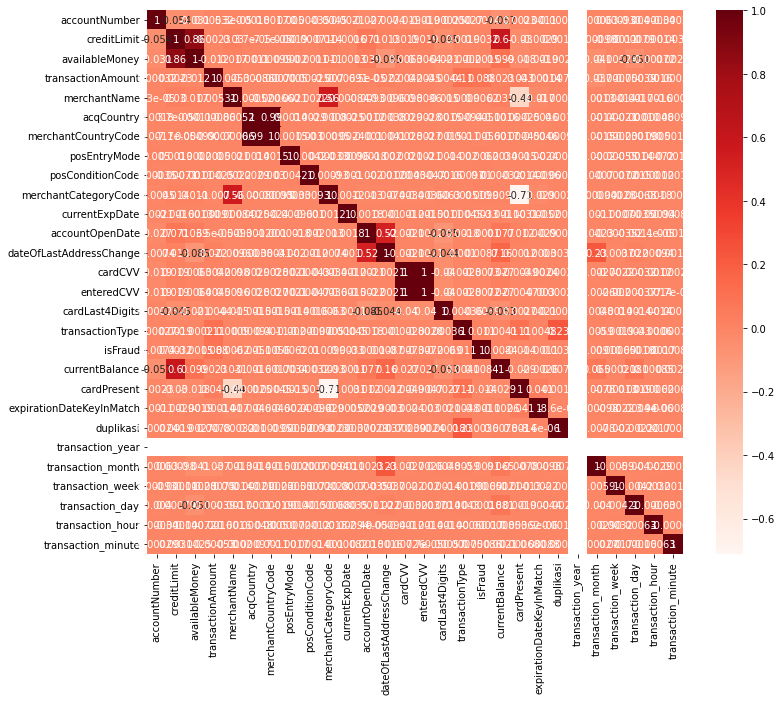

In [ ]:
# Plot Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Korelasi kolom numerical ke target variable
df.corrwith(df['isFraud'],axis=0).sort_values(ascending=False)

isFraud                     1.000000
transactionAmount           0.087525
transactionType             0.010933
posConditionCode            0.010223
merchantCategoryCode        0.009946
dateOfLastAddressChange     0.008696
currentBalance              0.008429
posEntryMode                0.006245
merchantName                0.006237
duplikasi                   0.003635
currentExpDate              0.003313
creditLimit                 0.003165
transaction_minute          0.000862
transaction_week            0.000651
transaction_day             0.000184
accountOpenDate            -0.000105
transaction_hour           -0.000173
expirationDateKeyInMatch   -0.001096
availableMoney             -0.001500
acqCountry                 -0.005093
merchantCountryCode        -0.005580
cardLast4Digits            -0.006858
enteredCVV                 -0.007249
cardCVV                    -0.007306
accountNumber              -0.007447
transaction_month          -0.009148
cardPresent                -0.014418
t

# Building Classification Model

## Train Test Set

In [ ]:
X = df.drop('isFraud',axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []

nr = SMOTE()
X_train, y_train = nr.fit_resample(X_train, y_train)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test,y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Logistic Regression']
result_df4 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'AUC':auc, 'Precision':precision}, index=model_names)
result_df4

,Accuracy,Recall,AUC,Precision
Logistic Regression,0.9825,0.0,0.5139,0.0


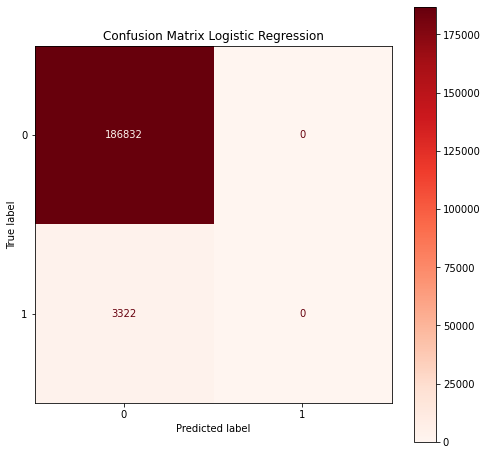

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix Logistic Regression')
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Reds, ax=ax);

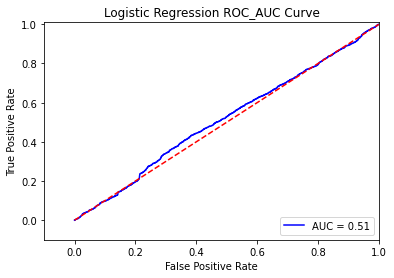

In [ ]:
fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Logistic Regression ROC_AUC Curve')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []

nr = SMOTE()
X_train, y_train = nr.fit_resample(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

y_pred_prob = gb.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test, y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Gradient Boosting']
result_df3 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'AUC':auc, 'Precision':precision}, index=model_names)
result_df3

,Accuracy,Recall,AUC,Precision
Gradient Boosting,0.9261,0.1933,0.6932,0.0534


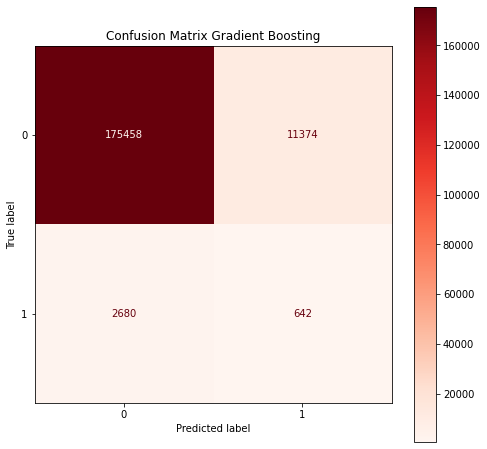

In [ ]:

fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix Gradient Boosting')
plot_confusion_matrix(gb, X_test, y_test, cmap=plt.cm.Reds, ax=ax);

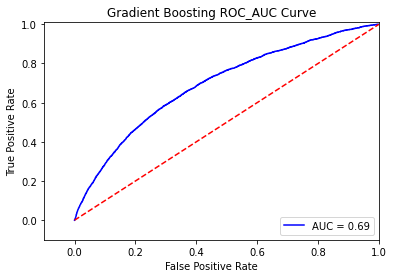

In [ ]:
fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Gradient Boosting ROC_AUC Curve')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost Classifier

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []

nr = SMOTE()
X_train, y_train = nr.fit_resample(X_train, y_train)

xgbc_base = XGBClassifier(random_state=0,scale_pos_weight=3)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

y_pred_prob = xgbc_base.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test, y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost Classifier']
result_df2 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'AUC':auc, 'Precision':precision}, index=model_names)
result_df2

,Accuracy,Recall,AUC,Precision
XGBoost Classifier,0.7827,0.4792,0.6928,0.0386


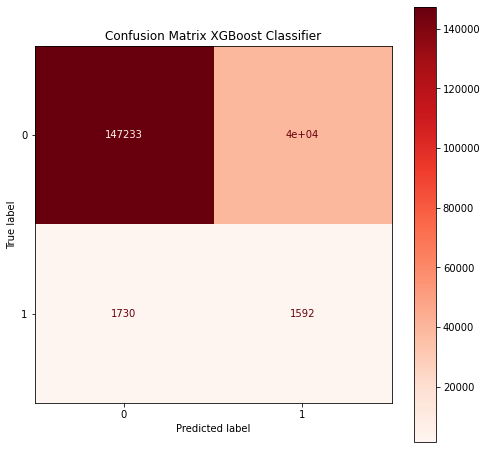

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix XGBoost Classifier')
plot_confusion_matrix(xgbc_base, X_test, y_test, cmap=plt.cm.Reds, ax=ax);

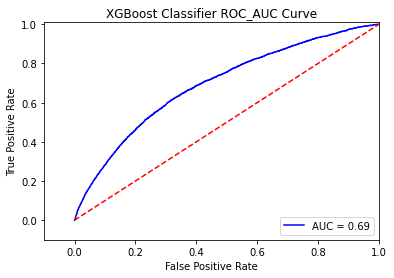

In [ ]:
fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('XGBoost Classifier ROC_AUC Curve')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred_prob = rf.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test, y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Random Forest']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'AUC':auc, 'Precision':precision}, index=model_names)
result_df1

,Accuracy,Recall,AUC,Precision
Random Forest,0.9788,0.0632,0.7818,0.1875


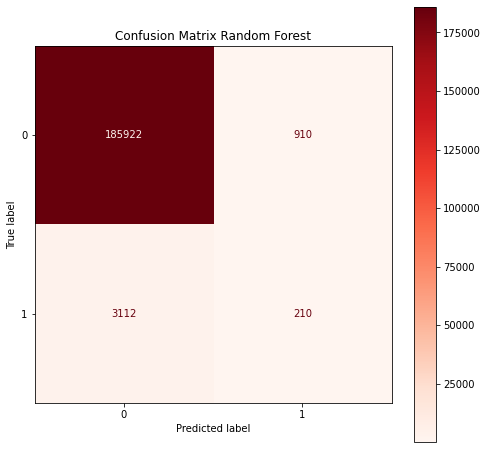

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix Random Forest')
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Reds, ax=ax);

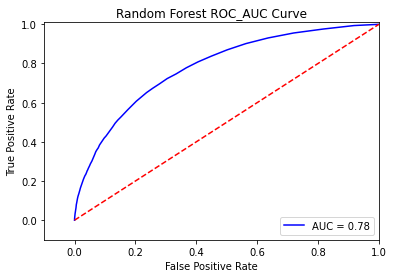

In [ ]:
fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Random Forest ROC_AUC Curve')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('{:20}    Importance: {}'.format(*pair)) for pair in feature_importances];

posEntryMode            Importance: 0.26
transactionAmount       Importance: 0.13
posConditionCode        Importance: 0.1
merchantName            Importance: 0.05
merchantCategoryCode    Importance: 0.04
transaction_week        Importance: 0.04
accountNumber           Importance: 0.03
accountOpenDate         Importance: 0.03
dateOfLastAddressChange    Importance: 0.03
cardLast4Digits         Importance: 0.03
currentBalance          Importance: 0.03
cardPresent             Importance: 0.03
transaction_month       Importance: 0.03
creditLimit             Importance: 0.02
availableMoney          Importance: 0.02
currentExpDate          Importance: 0.02
cardCVV                 Importance: 0.02
enteredCVV              Importance: 0.02
transaction_day         Importance: 0.02
transaction_hour        Importance: 0.02
transaction_minute      Importance: 0.02
transactionType         Importance: 0.01
acqCountry              Importance: 0.0
merchantCountryCode     Importance: 0.0
expirationDateKe

In [ ]:
result_final= pd.concat([result_df1,result_df2,result_df3,result_df4],axis=0)
result_final

,Accuracy,Recall,AUC,Precision
Random Forest,0.9788,0.0632,0.7818,0.1875
XGBoost Classifier,0.7827,0.4792,0.6928,0.0386
Gradient Boosting,0.9261,0.1933,0.6932,0.0534
Logistic Regression,0.9825,0.0000,0.5139,0.0000
